<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 20: Time Series Forecasting with Supervised Learning
# Upload ZIP file
from google.colab import files

uploaded = files.upload()  # upload the .zip file

Saving household_power_consumption.zip to household_power_consumption.zip


In [2]:
# Extracting the ZIP file
import zipfile
import os

zip_file = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("data")

os.listdir("data")

['household_power_consumption.txt']

In [4]:
# Loading Dataset & Set Date Index
import pandas as pd

file_path = "data/household_power_consumption.txt"

df = pd.read_csv(
    file_path,
    sep=';',
    parse_dates={'DateTime': ['Date', 'Time']},
    infer_datetime_format=True,
    na_values='?',
    low_memory=False
)

df.set_index('DateTime', inplace=True)

# Using only one column for forecasting
df = df[['Global_active_power']].dropna()

df.head()

/tmp/ipython-input-2639044340.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipython-input-2639044340.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipython-input-2639044340.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


,Global_active_power
DateTime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [5]:
# Train/Test Split (80/20)
split = int(len(df) * 0.8)

train = df.iloc[:split]
test = df.iloc[split:]

In [6]:
# Creating Lag Features
def create_lags(data, n_lags=3):
    df_lag = data.copy()
    for lag in range(1, n_lags + 1):
        df_lag[f'lag_{lag}'] = df_lag['Global_active_power'].shift(lag)
    return df_lag.dropna()

train_lag = create_lags(train)
test_lag = create_lags(test)

X_train = train_lag.drop('Global_active_power', axis=1)
y_train = train_lag['Global_active_power']

X_test = test_lag.drop('Global_active_power', axis=1)
y_test = test_lag['Global_active_power']

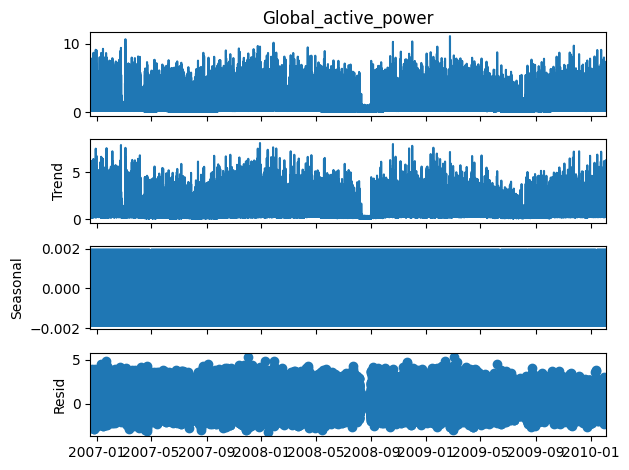

In [7]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decompose = seasonal_decompose(
    train['Global_active_power'],
    model='additive',
    period=24
)

decompose.plot()
plt.show()

In [8]:
# SUPERVISED MODELS
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE:", lr_mse)

Linear Regression MSE: 0.04824135166809976


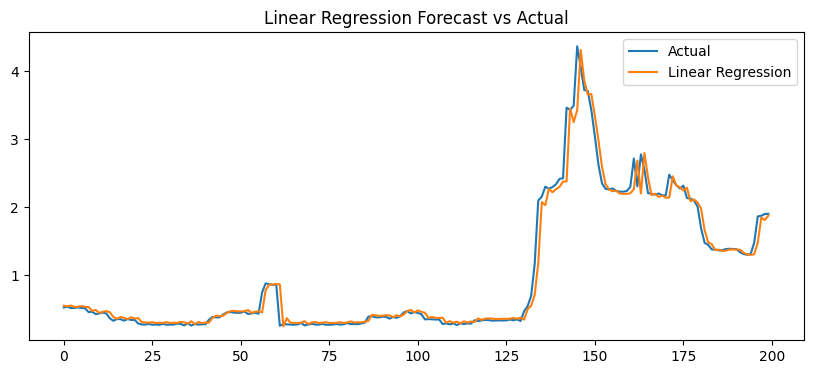

In [9]:
# Linear Regression Plot
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(lr_pred[:200], label='Linear Regression')
plt.legend()
plt.title("Linear Regression Forecast vs Actual")
plt.show()

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE:", rf_mse)

Random Forest MSE: 0.05212632177908868


In [ ]:
# Random Forest Plot
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(rf_pred[:200], label='Random Forest')
plt.legend()
plt.title("Random Forest Forecast vs Actual")
plt.show()

In [ ]:
# Gradient Boosting -XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    objective='reg:squarederror',
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
print("XGBoost MSE:", xgb_mse)

In [ ]:
# XGBoost Plot
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(xgb_pred[:200], label='XGBoost')
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.show()